# Predicción de Ingresos en Venta Online

## Modelo de Clasificación de Clientes

### Descripción del problema:

Trabajamos en una empresa de retail y debido al cambio en los hábitos de consumo de los clientes, se está potenciando ampliamente el servicio de venta online. Queremos realizar un modelo de aprendizaje automático para clasificar a los clientes en función de la probabilidad de generar ingresos al comprar en la web. El objetivo es realizar una serie de acciones específicas para los clientes que es más probable que hagan compras en la web.

Para ello, contamos con datos recopilados por la empresa de retail con su herramienta de Google Analytics.

### Descripción del dataset:

Contamos con 17 variables predictoras X y una variable a predecir Y. El numero total de muestras es de 12330.

En este dataset cada fila corresponde a una sesión única de un cliente en el sitio web durante un periodo de un año. Esto implica que no hay más de una sesión de un mismo cliente en el dataset; cada sesión es única y está asociada a un cliente diferente. En la columna que corresponderia a la variable a predecir observamos que 10422 clientes no generaron ingresos para la empresa , mientras que 1908 si lo hicieron.

### Informacion de las variables

__Variable dependiente Y:__ La variable 'Revenue' indica si el cliente durante su sesion generó ingresos "True" o por lo contrario "False". Es categorica.

__Variables independientes X:__

La mayoria de nuestras variables son numericas, exceptuando "Month", "VisitorType" y "Weekend". Más adelante las transformaremos a numéricas para no tener problemas con nuestro modelo

__Administrative, administrative duration, informational, informational duration, product related y product related duration__ representan el número de diferentes tipos de páginas visitadas por el visitante en esa sesión y el tiempo total dedicado a cada una de estas categorías de páginas. Los valores de estas características se derivan de la información del URL de las páginas visitadas por el usuario y se actualizan en tiempo real cuando el usuario realiza una acción, por ejemplo, pasar de una página a otra.

Las características __bounce rate, exit rate y page value__ representan las métricas medidas por Google Analytics para cada página del sitio de comercio electrónico. El valor de la característica bounce rate de una página web se refiere al porcentaje de visitantes que entran en el sitio desde esa página y luego salen (rebote) sin activar ninguna otra solicitud al servidor de análisis durante esa sesión. El valor de la característica exit rate para una página web específica se calcula como para todas las visitas a la página, el porcentaje que fueron las últimas en la sesión. La función Page Value representa el valor medio de una página web que un usuario ha visitado antes de completar una transacción de comercio electrónico.

La característica de __special day__ indica la cercanía de la hora de visita del sitio a un día especial específico (por ejemplo, el Día de la Madre, San Valentín) en el que es más probable que las sesiones finalicen con una transacción. El valor de este atributo se determina teniendo en cuenta la dinámica del comercio electrónico, como la duración entre la fecha del pedido y la fecha de entrega. Por ejemplo, para San Valentín, este valor toma un valor distinto de 0 entre el 2 y el 12 de febrero, 0 antes y después de esta fecha a menos que esté cerca de otro día especial, y su valor máximo de 1 el 8 de febrero.

El conjunto de datos también incluye el __sistema operativo, el navegador, la región, el tipo de tráfico, el tipo de visitante como visitante__ que regresa o como nuevo visitante, un valor booleano que indica si la fecha de la visita es de fin de semana, y el mes del año.

Estos datos pueden obtenerse tambien de la siguiente pagina web: https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

## Carga de librerías:

In [3]:
from IPython.display import display, HTML

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score
from IPython.core.display import display, HTML
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import calendar
warnings.filterwarnings('ignore')

## Definición de funciones:

## Lectura de datos:

In [5]:
XY = pd.read_csv(r"C:\Users\Playtomic\Documents\imf\modulo 4 (Machine Learning)\Caso final ML\DATA\online_shoppers_intention (1).csv")
XY[:2]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False


In [6]:
print(u' - Numero de filas del dataset:', XY.shape[0])
print(u' - Numero de columnas del dataset:', XY.shape[1])
print(u' - Nombre de las variables:', XY.columns)

 - Numero de filas del dataset: 12330
 - Numero de columnas del dataset: 18
 - Nombre de las variables: Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


## Análisis exploratorio de los datos (EDA)

In [7]:
XY.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

### Histogramas y Boxplots: 
Comenzamos visualizando la distribución de las variables numéricas utilizando histogramas y boxplots. Esto nos dará una idea de la dispersión de los datos y la presencia de valores atípicos.

In [8]:
var_numericas = XY.select_dtypes(include='number')
var_numericas[:1]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,1,1,1,1


Antes de generar el boxplot debemos normalizar nuestras variables ya que seguramente tienen escalas muy distintas por lo tanto puede generar problemas al momento de la visualizacion

In [10]:
var_num_normalizado = (var_numericas-var_numericas.mean())/var_numericas.std()

### Boxplot

Text(0.5, 0, 'variables numericas')

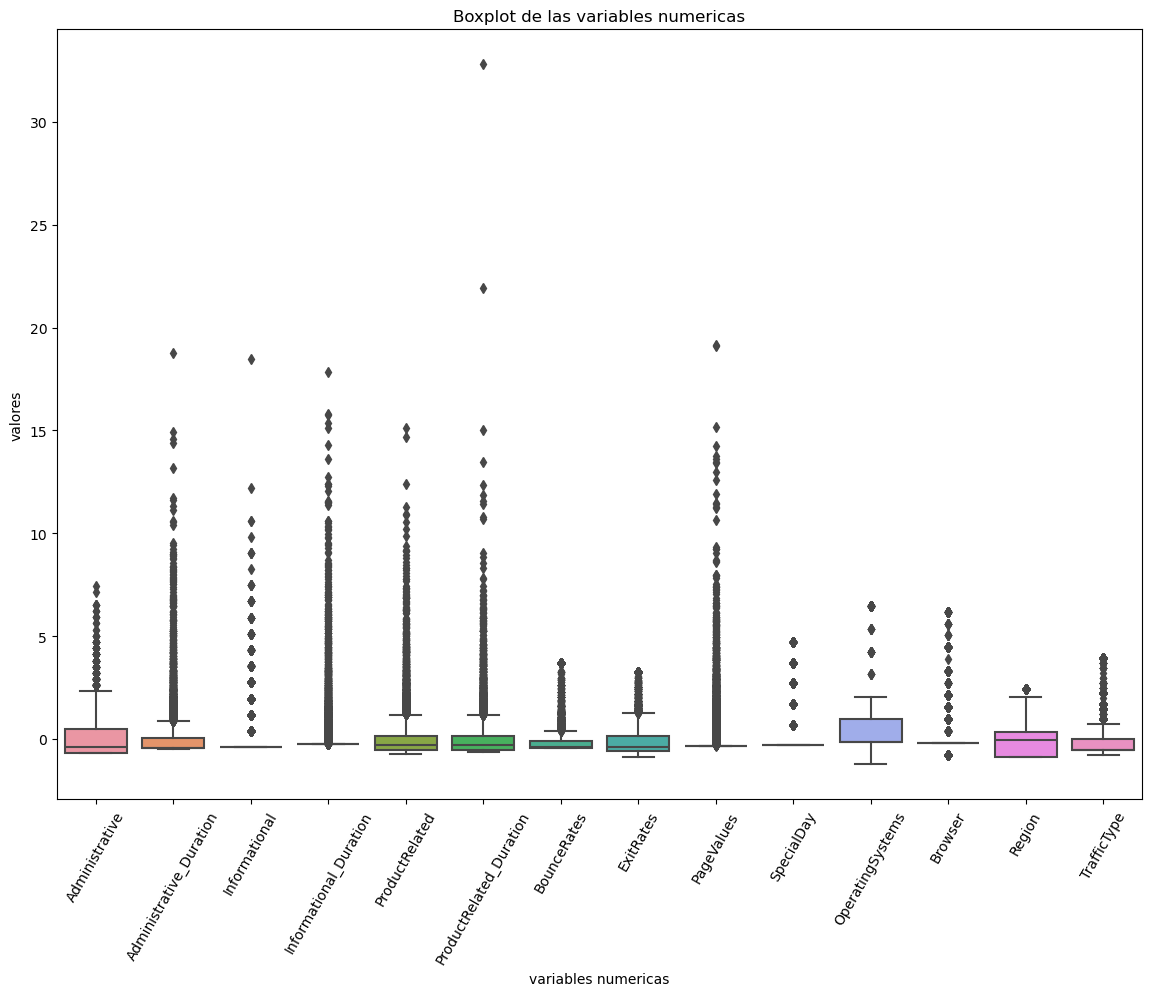

In [11]:
plt.figure(figsize=(14,10))
sns.boxplot(var_num_normalizado)
plt.xticks(rotation=60)
plt.title('Boxplot de las variables numericas')
plt.ylabel('valores')
plt.xlabel('variables numericas')

### Histogramas

Para el histograma no será necesario utilizar los valores normalizados para generar una visualizacion interpretable, por lo tanto usamos var_numericas sin normalizar

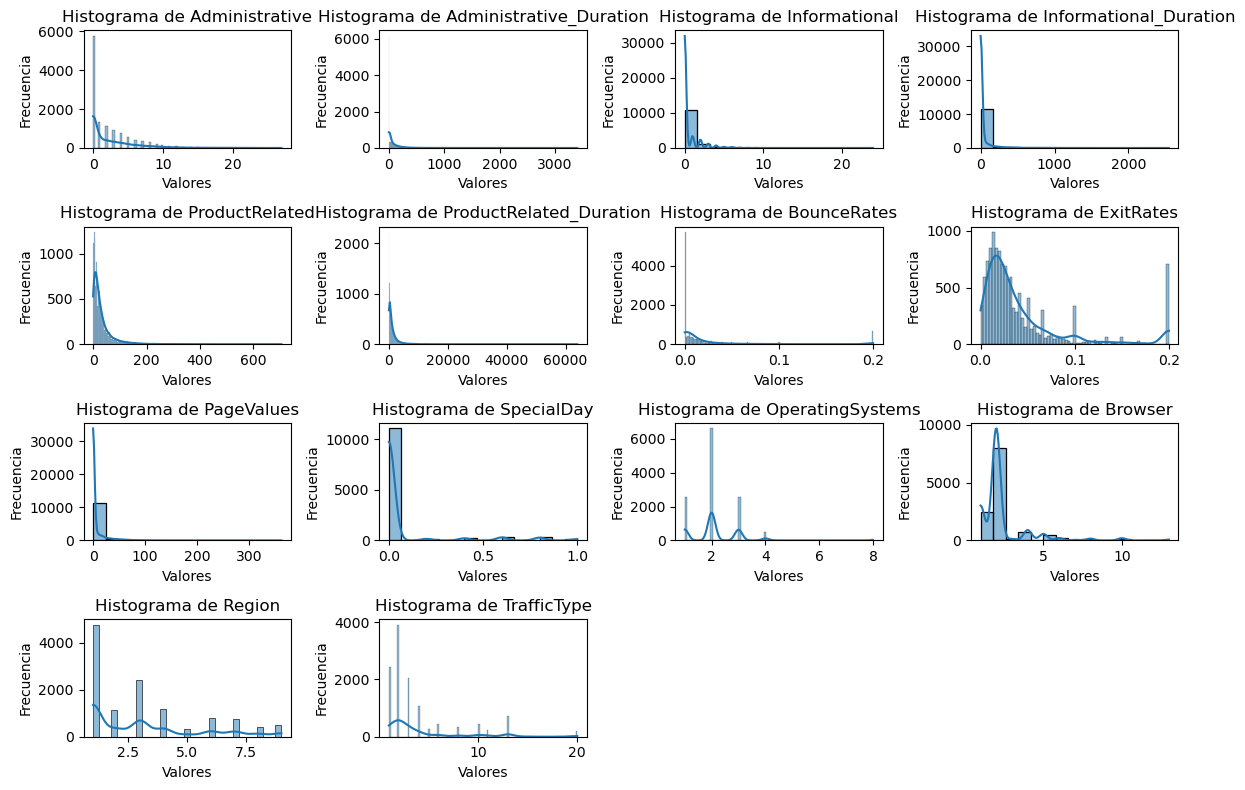

In [12]:
plt.figure(figsize=(12,8))

for i, col in enumerate(var_numericas.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(var_numericas[col], kde=True)
    plt.title(f'Histograma de {col}')
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')
    plt.tight_layout()

## Análisis de Frecuencia

Para las variables categóricas, "Month", "VisitorType" y "Weekend" realizaré un analisis de frecuencia para entender su distribucion

<Axes: xlabel='Month', ylabel='count'>

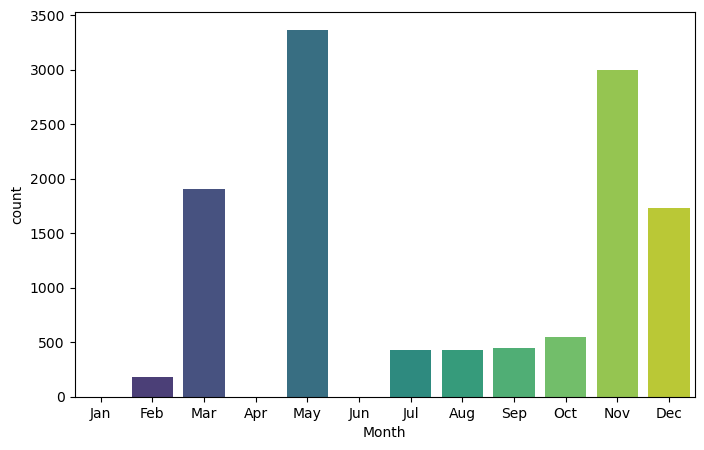

In [13]:
month_order = [calendar.month_abbr[i] for i in range(1, 13)]
plt.figure(figsize=(8,5))
sns.countplot(XY, x='Month', order=month_order, palette='viridis')

Text(0.5, 0, 'Type of Visitor')

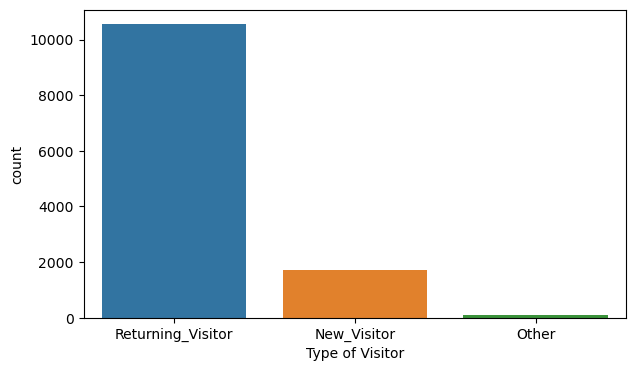

In [14]:
plt.figure(figsize=(7,4))
sns.countplot(XY, x='VisitorType')
plt.xlabel('Type of Visitor')

<Axes: xlabel='Weekend', ylabel='count'>

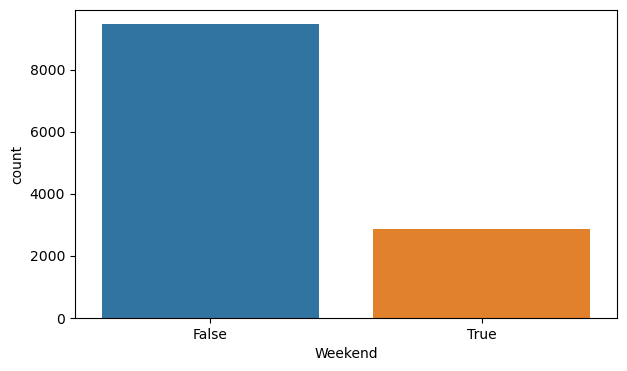

In [15]:
plt.figure(figsize=(7,4))
sns.countplot(XY, x='Weekend')

## Análisis de la distribucion de nuestra variable dependiente "Revenue"

Text(0.5, 0, '¿Generó ingresos?')

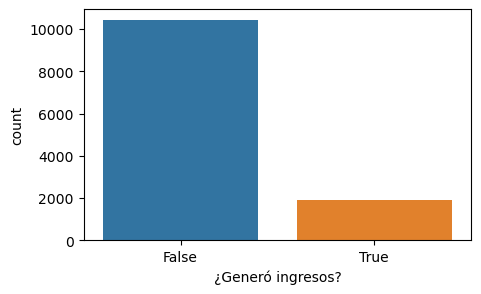

In [16]:
plt.figure(figsize=(5,3))
sns.countplot(XY, x='Revenue')
plt.xlabel('¿Generó ingresos?')
#Con esto concluimos el EDA, observando que solo aproximadamente 2000 clientes generaron ingresos, mientras que mas de 10000 no lo hicieron

## Preprocesamiento de datos

### Missings:

In [17]:
XY.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [18]:
XY.shape[0]

12330

Tenemos mas de 12000 muestras de clientes y apenas en 14 no tenemos todos los dato completos como deseariamos, por lo tanto, en vez de rellenar estos valores nulos con NaN, simplemente los eliminaremos de nuestro dataset. Eliminar estos de nuestro modelo no afectará en nada

In [19]:
XY = XY.dropna()

## Categóricas a numéricas:

Es necesario convertir las variables categóricas a numéricas de cara a introducirlas en modelos:

In [20]:
#Lista de variables categoricas
XY.select_dtypes(exclude='number').columns

Index(['Month', 'VisitorType', 'Weekend', 'Revenue'], dtype='object')

In [ ]:
XY = XY.drop(columns=['ExitRates', 'ProductRelated'], axis=1)

In [22]:
# Este objeto codifica las variables categóricas a números distintos.
le = LabelEncoder()

### Month

In [23]:
XY.Month.value_counts()
#Los meses del año los transformaré manualmente para ordernarlos como irian en un calendario comun, del 1 al 12.

Month
May     3363
Nov     2998
Mar     1894
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

In [24]:
month_dic = { 'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
XY['Month'].replace(month_dic, inplace=True)

### VisitorType

In [25]:
XY.VisitorType.value_counts()

VisitorType
Returning_Visitor    10537
New_Visitor           1694
Other                   85
Name: count, dtype: int64

In [26]:
XY.loc[XY.VisitorType != 'Returning_Visitor', 'VisitorType'] = 0
XY.loc[XY.VisitorType == 'Returning_Visitor', 'VisitorType'] = 1
XY.VisitorType = XY.VisitorType.astype(int)

### Weekend

In [27]:
XY.Weekend.value_counts()

Weekend
False    9451
True     2865
Name: count, dtype: int64

In [28]:
dic = {True: 1, False:0}
XY.Weekend.replace(dic, inplace=True)

### Revenue

In [32]:
XY.Revenue.value_counts()
dic = {True: 1, False:0}
XY.Revenue.replace(dic, inplace=True)

### Comprobación tipos no numéricos:

In [34]:
XY.select_dtypes(exclude=['number']).columns

Index([], dtype='object')

### Matriz de correlaciones

Text(0.5, 1.0, 'Matriz de correlaciones de Pearson')

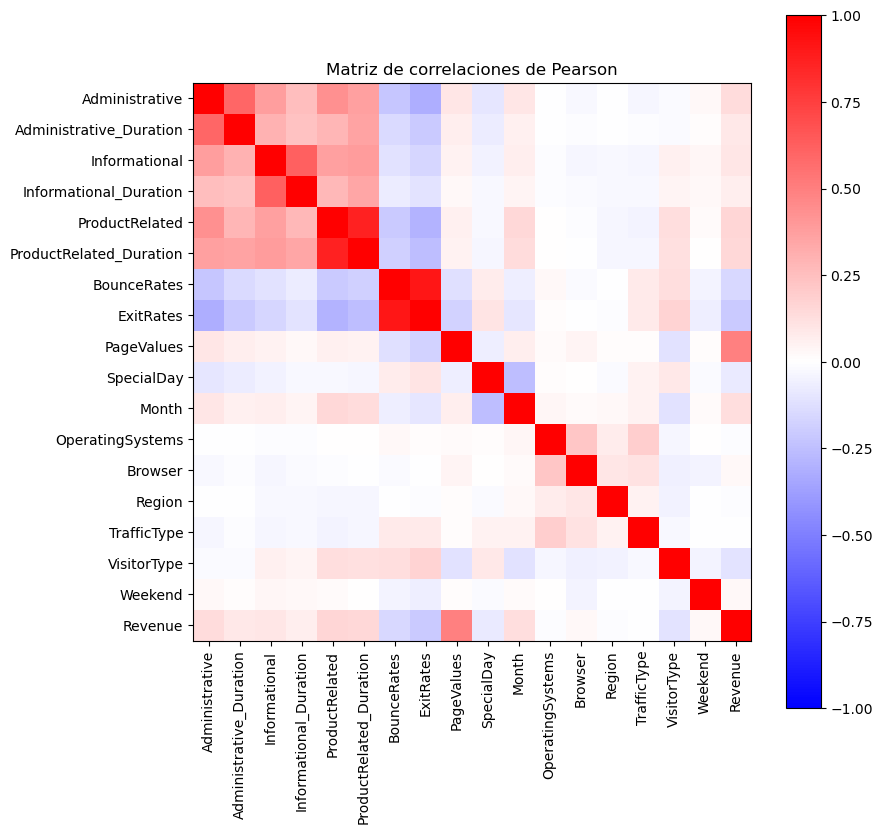

In [35]:
matriz_correlaciones = XY.corr(method='pearson')
n_ticks = len(XY.columns)
plt.figure( figsize=(9, 9) )
plt.xticks(range(n_ticks), XY.columns, rotation='vertical')
plt.yticks(range(n_ticks), XY.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('bwr')))
plt.title('Matriz de correlaciones de Pearson')

El umbral para determinar si una correlacion entre dos variables es suficientemente fuerte para eliminar alguna de ellas será del 0.80 y -0.80

Si encontramos variables con correlacion tan fuerte alguna de las dos está sobrando, y debemos eliminarla para ayudar a reducir la multicolinealidad y mejorar la interpretabilidad del modelo.

En nuestro caso, ExitRates <-> BounceRates tienen correlacion del 0.91. Eliminaremos ExitRates

Por otro lado, ProductRelated <->ProductRelated_duration correlacion del 0.86. Eliminamos ProductRelated

In [40]:
#Borramos las columnas, pero el codigo que lo realizó no aparece ya que lo hemos llamado nuevamente y nos aparece el error de q no encontrará las columas , ya que ya han sido eliminadas
XY.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated_Duration', 'BounceRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

### Division en features X + target Y

In [41]:
X = XY.drop('Revenue', axis=1)
Y = XY['Revenue']

### Estandarización de los datos previa:

In [42]:
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X)

### División en train y test:

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X_estandarizado, Y, test_size = 0.2, random_state=0)

## Aplicamos un modelo de regresión logística

In [46]:
modelo = LogisticRegression()
parametros = {"C": [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,0.09], 
              "class_weight":['balanced', None]}
#C: Este parámetro controla la fuerza de regularización. Valores más pequeños especifican una regularización más fuerte. En mi caso, estoy probando varios valores desde 0. hasta 0.09 en incrementos de 0.01.
#class_weight: Este parámetro se utiliza para manejar el desequilibrio de clases. 
#'balanced' indica que el modelo ajustará automáticamente los pesos de clase de manera inversamente proporcional al número de muestras en cada clase. 
#None significa que no se aplicará ningún peso de clase.

Con GridSearchCV se realiza una optimización. Esta función lo que hace es ajustar el modelo que se pasa como argumento con todas las combinaciones posibles de los parámetros. En este caso, todas las combinaciones de C y class_weights.

In [47]:
modelo_gs = GridSearchCV(modelo, param_grid=parametros, cv = 5, scoring='roc_auc')
modelo_gs.fit(X_train, Y_train)
# modelo_gs: Aquí están creando una nueva instancia de GridSearchCV llamada modelo_gs.

# modelo: El modelo base que están utilizando, en este caso, es una regresión logística (LogisticRegression).
# parametros: El diccionario que contiene las combinaciones de hiperparámetros que se probarán, como se definió previamente.
# cv=5: Se utiliza validación cruzada con 5 folds. Cada combinación de hiperparámetros se evaluará utilizando este esquema de validación cruzada.
# scoring='roc_auc': Este parámetro indica que la métrica a optimizar durante la búsqueda de hiperparámetros es el área bajo la curva ROC (ROC AUC). La curva ROC y su área bajo la curva (AUC) son métricas comúnmente utilizadas para evaluar el rendimiento de modelos de clasificación binaria.
# fit(X_train, Y_train): Finalmente, se ajusta el modelo de búsqueda de hiperparámetros utilizando los datos de entrenamiento (X_train, Y_train).

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
                               0.08, 0.09],
                         'class_weight': ['balanced', None]},
             scoring='roc_auc')

In [48]:
print(modelo_gs.best_params_, "\nROC AUC: {}".format(round(modelo_gs.best_score_,2)))

{'C': 0.09, 'class_weight': 'balanced'} 
ROC AUC: 0.9


In [51]:
df_search = pd.DataFrame.from_dict(modelo_gs.cv_results_)

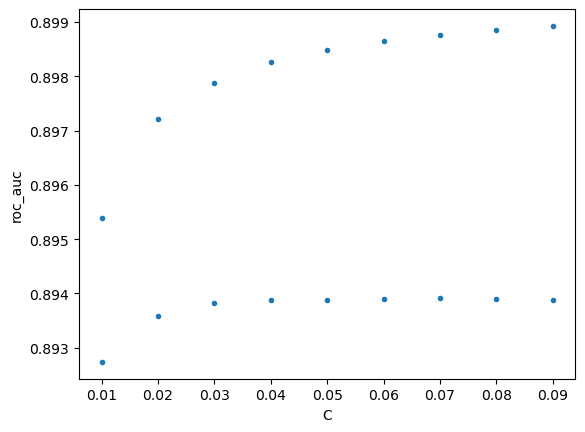

In [52]:
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.plot( df_search['param_C'], df_search['mean_test_score'], '.')
#Vemos como el ROC_AUC va mejorando a medida que aumenta C hasta llegar al optimo

## Analizamos el modelo con el mejor alpha

En este paso nos quedamos con los mejores parámetros obtenidos en el paso anterior:

In [54]:
reg_log = LogisticRegression(C=modelo_gs.best_params_['C'], class_weight=modelo_gs.best_params_['class_weight'])

In [55]:
reg_log.fit(X_train, Y_train)
#Durante este paso, el modelo aprende la relación entre las características (variables independientes) y la variable objetivo (variable dependiente).

LogisticRegression(C=0.09, class_weight='balanced')

 Ya tenemos el modelo elegido y optimizado, ahora comparamos con el conjunto Test

Queremos hacer predicciones sobre nuevos datos que el modelo no ha visto, por esto usaremos X_test.

In [93]:
y_test_pred_prob = reg_log.predict_proba(X_test) #Cada fila de esta matriz representa una instancia en X_test, y las dos columnas corresponden 
# a las probabilidades predichas para las clases "no ingresa" (columna 0) y "ingresa" (columna 1), respectivamente.

y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
# Esto muestra las probabilidades predichas para la clase positiva para las instancias donde Y_test =1, que son las instancias que realmente pertenecen 
# a la clase positiva según las etiquetas verdaderas. Sigue siendo un array donde en la izq es la prediccion de no ingreso y derecha ingreso.

y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]

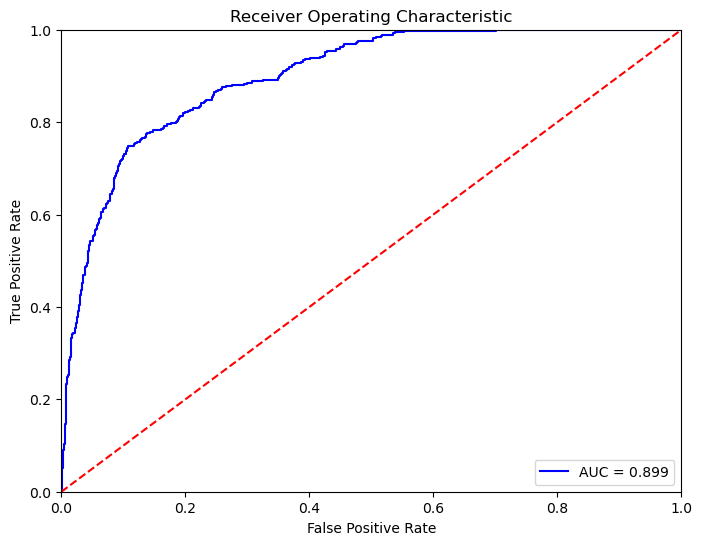

In [130]:
preds = y_test_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Umbralizo las predicciones:

El umbral a utilizar será el que maximice el área bajo la curva ROC (AUC). 

Para calcular el umbral que maximiza el área bajo la curva ROC (AUC), utilizaré el método del punto de operación óptimo (Optimal Operating Point - OOP). Este método implica encontrar el umbral que maximiza la suma de la sensibilidad  y la especificidad.

In [122]:
# Calculo la curva ROC
fpr, tpr, umbrales = roc_curve(Y_test, preds) #fpr: false positive rate, tpr:true positive rate, y los umbrales utilizados para calcular estos rates

# Calculo el AUC máximo
auc_maximo = roc_auc_score(Y_test, preds)

# Encontramos el índice del umbral que maximiza la suma de sensibilidad y especificidad
umbral_optimo_idx = np.argmax(tpr - fpr)

# Obtenenemos el umbral óptimo
umbral_optimo = umbrales[umbral_optimo_idx]

print('AUC máximo:', auc_maximo)
print('Umbral óptimo:', umbral_optimo)


AUC máximo: 0.8985960809488873
Umbral óptimo: 0.4878562597016855


In [128]:
umbral = umbral_optimo
y_umbralizadas = 1*(y_test_pred_prob[:, 1] > umbral)

In [129]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas),2))) 

Matriz de confusión
 [[1864  224]
 [  96  280]]

Accuracy	0.87
Sensitividad	0.74
Precisión	0.56


## Conclusion de nuestro modelo de regresión logística supervisada predictiva

* __AUC Máximo:__
El área bajo la curva ROC (AUC) máximo alcanzado por este modelo es de __0.8986__. Esta es una medida de la capacidad de discriminación del modelo, donde un valor de 1 indica un modelo perfecto y 0.5 indica un modelo aleatorio.

* __Umbral Óptimo:__
El umbral óptimo encontrado para maximizar el AUC es de aproximadamente 0.4879.

* __Accuracy:__ La precisión global del modelo es del 87%. Esto indica que el 87% de las clasificaciones hechas por el modelo son correctas

* __Sensitividad__ (Tasa de Verdaderos Positivos): De todos los clientes que generan dinero, el modelo es capaz de detectar correctamente el 74% de ellos.

* __Precision:__ el modelo acierta alrededor del 56% de las veces cuando predice que un cliente generará dinero.

Vamos ahora a obtener resultados con un modelo distinto, y compararemos sus metricas AUC para determinar cual es mejor modelo

# Aplicamos un modelo de Redes Neuronales

Haremos uso de la libreria sklearn ya que esta cuenta con un clasificador __MLPCLassifier__ o Multi-layer Perceptron Classifier.
Durante el entrenamiento, la red neuronal ajusta sus conexiones (llamadas "pesos") para que las salidas predichas se acerquen más a las salidas deseadas.
En este caso las capas de entrada serán todas aquellas caracteristicas que definen la instancia del cliente en la web y 
las capas de salida tendrán una sola neurona que generará una predicción continua entre 0 y 1, que representa la probabilidad de que un cliente genere ingresos al comprar en la web.

In [136]:
modelo = MLPClassifier()
parametros = {'solver': ['lbfgs'], #utilizamos el algoritmo'lbfgs', que es un algoritmo eficiente para problemas pequeños y medianos.
              'max_iter': [100,200,300,500], # Iteraciones máximas en cada red
              'alpha': 10.0 ** -np.arange(1, 10), # Parámetro de regularización L2 para evitar sobreajuste
              'hidden_layer_sizes':np.arange(30, 35), # Número de neuronas en cada capa, se está explorando un rango de valores de 30 a 34 neuronas.
              'random_state':[0]}

In [137]:
# Con GridSearchCV nos ayuda a encontrar la mejor combinación de hiperparámetros para nuestro modelo.
modelo_gs = GridSearchCV(modelo, param_grid=parametros, cv =3, scoring='roc_auc', n_jobs=-1, verbose=10)

GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]),
                         'hidden_layer_sizes': array([30, 31, 32, 33, 34]),
                         'max_iter': [100, 200, 300, 500], 'random_state': [0],
                         'solver': ['lbfgs']},
             scoring='roc_auc', verbose=10)

In [138]:
# Ahora entrenamos el modelo con nuestras variables train para encontrar la mejor combinacion de hiperparametros.
modelo_gs.fit(X_train, Y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]),
                         'hidden_layer_sizes': array([30, 31, 32, 33, 34]),
                         'max_iter': [100, 200, 300, 500], 'random_state': [0],
                         'solver': ['lbfgs']},
             scoring='roc_auc', verbose=10)

Imprimimos los mejores hiperparámetros encontrados durante la búsqueda de hiperparámetros, así como el valor correspondiente de la métrica de evaluación ROC AUC

In [139]:
print(modelo_gs.best_params_, "\nROC AUC: {}".format(round(modelo_gs.best_score_,2)))

{'alpha': 1e-05, 'hidden_layer_sizes': 30, 'max_iter': 100, 'random_state': 0, 'solver': 'lbfgs'} 
ROC AUC: 0.9


Ahora que sabemos los mejores parametros ajustamos un modelo con estos

In [144]:
mejor_modelo = MLPClassifier(**modelo_gs.best_params_, verbose=10)

In [145]:
mejor_modelo.fit(X_train, Y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=30, max_iter=100, random_state=0,
              solver='lbfgs', verbose=10)

In [148]:
## Análisis de las predicciones
y_test_pred_prob = mejor_modelo.predict_proba(X_test) 
#Las columns del array nos dicen la probabilidad de la instancia del cliente x de generar ingresos o no
#La columna 1 representa la prob de la clase negativa o que Y=0 y la segunda que Y=1 (generar ingresos)

y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
# contendrá las probabilidades de pertenencia a la clase positiva (generar ingresos para la tienda)
# para las instancias en X_test que realmente pertenecen a la clase positiva.

y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]] #la inversa de lo anterior

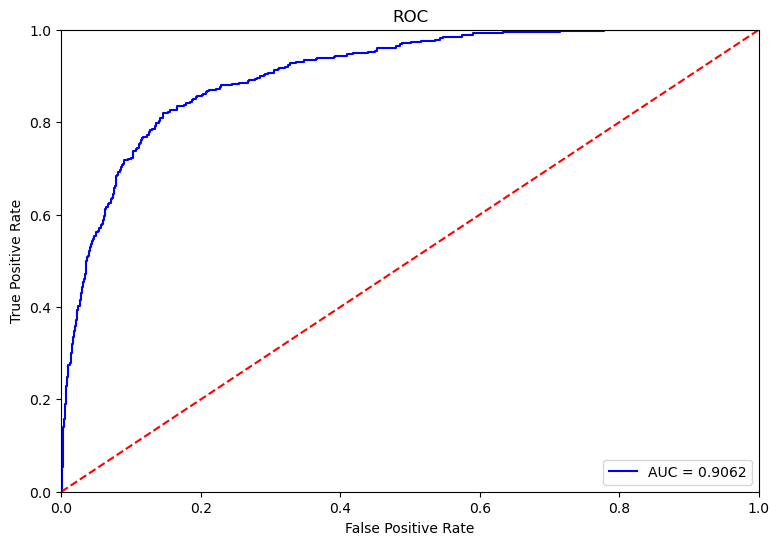

In [153]:
preds = y_test_pred_prob[:,1]
#Extrae del array la parte derecha del [  ,  ] lo cual seria la probabilidad de general ingresos (Y=1).

fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(9, 6))
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Umbralizo las predicciones:

Como se ha mencionado anteriormente, usaremos el umbral que maximiza el area de la curva ROC (AUC)
Este método implica encontrar el umbral que maximiza la suma de la sensibilidad (TPR) y la especificidad (1-FPR)

In [157]:
# Calculamos la suma de TPR y FPR para cada punto en la curva ROC
suma_tpr_fpr = tpr + (1 - fpr)

# Encuentra el índice del punto en la curva ROC donde la suma es máxima
indice_max_suma = np.argmax(suma_tpr_fpr)

# El umbral óptimo corresponde al umbral en ese índice
umbral_optimo = threshold[indice_max_suma]

# Calcula el valor de AUC con el umbral óptimo
auc_optimo = metrics.auc(fpr, tpr)

print("Umbral óptimo que maximiza AUC:", umbral_optimo)
print("AUC obtenido con el umbral óptimo:", auc_optimo)

Umbral óptimo que maximiza AUC: 0.13826136320333676
AUC obtenido con el umbral óptimo: 0.9062423575446319


In [158]:
umbral = umbral_optimo
y_umbralizadas = 1*(y_test_pred_prob[:, 1] > umbral)

In [161]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas),2)))

Matriz de confusión
 [[1783  305]
 [  69  307]]

Accuracy	0.85
Sensitividad	0.82
Precisión	0.5


## Conclusion de nuestro modelo de Redes Neuronales

* __AUC Máximo__: El área bajo la curva ROC (AUC) máximo alcanzado por este modelo es de __0.9062__ lo cual es mayor al del modelo anterior __(0.8986)__

* __Umbral Óptimo:__ El umbral óptimo encontrado para maximizar el AUC es de aproximadamente 0.138.

* __Accuracy:__ La precisión global del modelo es del 85%, es decir, el 85% de las clasificaciones hechas por el modelo son correctas. En el anterior obtuvimos 87%.

* __Sensitividad__ (Tasa de Verdaderos Positivos): De todos los clientes que generan dinero, el modelo es capaz de detectar correctamente el 82% de ellos. Superior al anterior (74%).

* __Precision:__ el modelo acierta alrededor del 50% de las veces cuando predice que un cliente generará dinero. Inferior al anterior modelo (56%)

## Aplicamos un Modelo de Clasificación Random Forest

En random forests no necesitamos los datos normalizados, ya que este modelo no es sensibles a la escala de las características. Por lo tanto, usamos los datos estandar

In [168]:
# Dividimos los datos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [171]:
# Creamos el modelo de Bosques Aleatorios
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)

In [172]:
# Entrenamos el modelo
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [175]:
# Realizamos predicciones en el conjunto de prueba
y_pred = random_forest.predict(X_test)

In a Random Forest classifier, the decision boundary is determined by the majority vote of multiple decision trees. Each decision tree individually predicts a class label for a given sample, and the final prediction of the Random Forest is determined by aggregating the predictions of all the trees. Since each decision tree typically outputs a discrete class label, there is no need for an additional thresholding step. In other words, we dont use threshold.

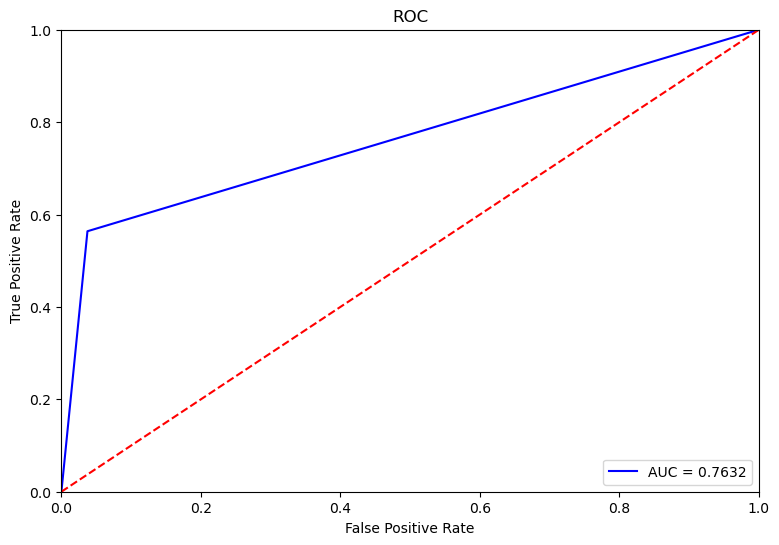

In [193]:
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(9, 6))
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# the ROC curve for a Random Forest classifier may not exhibit a smooth arc shape (as it did below), but rather may have a more jagged or irregular 
# appearance due to the discrete nature of the predictions made by individual decision trees.

In [197]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_pred))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_pred),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_pred),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_pred),2)))

Matriz de confusión
 [[2010   78]
 [ 164  212]]

Accuracy	0.9
Sensitividad	0.56
Precisión	0.73


## Conclusion de nuestro modelo de Random Forests

* AUC Máximo: El área bajo la curva ROC (AUC) máximo alcanzado por este modelo es de 0.76, lo cual nos indica que es el modelo que tiene menor capacidad de discriminacion

* Accuracy: La precisión global del modelo es del 90%, es decir, el 90% de las clasificaciones hechas por el modelo son correctas. En los anteriores obtuvimos 85% y 87% respectivamente

* Sensitividad (Tasa de Verdaderos Positivos): De todos los clientes que generan dinero, el modelo es capaz de detectar correctamente el 56% de ellos. Inferior a los anteriores 82% y 72% respectivamente

* Precision: el modelo acierta alrededor del 73% de las veces cuando predice que un cliente generará dinero. Superior a los anteriores modelos 50% y 56% respectivamente

# Conclusión General del Proyecto y Elección del Mejor Modelo

La elección del modelo debe basarse en una evaluación cuidadosa de todas las métricas proporcionadas que hemos estudiado tomando en cuenta el contexto específico del proyecto y las necesidades de la empresa

Dado que estamos trabajando en el sector de retail y el objetivo es maximizar los ingresos a través de estrategias de venta en línea, la prioridad principal debería ser, en mi opinion, identificar de manera efectiva a los clientes que tienen una alta probabilidad de generar ingresos. Por lo tanto, la __sensibilidad (tasa de verdaderos positivos)__ se vuelve crucial en este contexto. Queremos asegurarnos de capturar la mayor cantidad posible de clientes que están dispuestos a realizar compras en línea para poder dirigir estrategias de marketing específicas hacia ellos y aumentar las ventas.

Si bien el __accuracy__ es importante para tener una idea general del rendimiento del modelo, una alta sensibilidad garantiza que no perdamos oportunidades importantes de negocio al identificar correctamente a los clientes que generan ingresos. La precisión también es relevante, especialmente para asegurarse de que las predicciones positivas del modelo sean confiables y precisas.

Por otra parte también tenemos el importante AUC que nos da una idea general de qué tan bien el modelo está realizando la clasificación en comparación con un modelo aleatorio.

Por lo tanto, en este contexto particular, se podría argumentar que __la sensibilidad es la métrica más relevante para la elección del modelo__. Un modelo con alta sensibilidad garantizará que la empresa pueda identificar eficazmente a los clientes valiosos y tomar medidas para retenerlos o aumentar sus compras en línea. Sin embargo, también es importante tener en cuenta el equilibrio entre sensibilidad y precisión.

Sabiendo esto, __elegimos el modelo de Redes Neuronales__ que nos entrega una sensibilidad de 82%, es decir, de todos los clientes que generan dinero, el modelo es capaz de detectar correctamente el 82% de ellos. Superior a los otros dos.
Y por último además de tener la sensibilidad más alta tambien lo es el area abjo de la curva ROC (AUC) que presenta un 0.90.